# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
conda install matplotlib

Retrieving notices: ...working... done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /Users/alicekrauze/opt/anaconda3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2023.7.22          |   py38hecd8cb5_0         154 KB
    conda-23.7.2               |   py38hecd8cb5_0         1.0 MB
    contourpy-1.0.5            |   py38haf03e11_0         191 KB
    intel-openmp-2023.1.0      |   ha357a0b_43547         635 KB
    jupyter_client-7.4.9       |   py38hecd8cb5_0         213 KB
    jupyter_server-1.2

matplotlib-base-3.7. | 6.7 MB    | #####2                                |  14% 










mkl-2023.1.0         | 181.0 MB  |                                       |   0% 













numpy-base-1.23.5    | 5.8 MB    |                                       |   0% 












certifi-2023.7.22    | 154 KB    | ###8                                  |  10% 





matplotlib-3.7.1     | 9 KB      | ##################################### | 100% 











mkl_fft-1.3.6        | 192 KB    | ###                                   |   8% 






matplotlib-base-3.7. | 6.7 MB    | ########4                             |  23% 













numpy-base-1.23.5    | 5.8 MB    | ##                                    |   6% 










mkl-2023.1.0         | 181.0 MB  |                                       |   0% 











mkl_fft-1.3.6        | 192 KB    | ###########################7          |  75% 














kiwisolver-1.4.4     | 62 KB     | #########5                            |  26% 






mkl-2023.1.0         | 181.0 MB  | ############5                         |  34% 










mkl-2023.1.0         | 181.0 MB  | #############1                        |  36% 










mkl-2023.1.0         | 181.0 MB  | #############8                        |  37% 










mkl-2023.1.0         | 181.0 MB  | ##############4                       |  39% 



pip-23.2.1           | 2.6 MB    | ##################################### | 100% 










mkl-2023.1.0         | 181.0 MB  | ##############9                       |  41% 










mkl-2023.1.0         | 181.0 MB  | ###############6                      |  42% 










mkl-2023.1.0         | 181.0 MB  | ################2                     |  44% 










mkl-2023.1.0         | 181.0 MB  | ################9                     |  46% 










mkl-2023.1.0         | 181.0 MB  | #################7                    |  48% 










mkl-2023.1.0         | 181.0 MB  | ##################4                   |  50% 










mkl-20

In [5]:
conda install pandas

Solving environment: done

## Package Plan ##

  environment location: /Users/alicekrauze/opt/anaconda3

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bottleneck-1.3.5           |   py38h67323c0_0         113 KB
    numexpr-2.8.4              |   py38h47b59a4_1         130 KB
    pandas-1.5.3               |   py38h07fba90_0        11.3 MB
    ------------------------------------------------------------
                                           Total:        11.5 MB

The following NEW packages will be INSTALLED:

  bottleneck         pkgs/main/osx-64::bottleneck-1.3.5-py38h67323c0_0 
  numexpr            pkgs/main/osx-64::numexpr-2.8.4-py38h47b59a4_1 
  pandas             pkgs/main/osx-64::pandas-1.5.3-py38h07fba90_0 



numexpr-2.8.4        | 130 KB    |                                       |   0% 
bottleneck-1.3.5     | 113 KB    |           

In [6]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [8]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [9]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [23]:
# Extract all rows of data
rows = soup.find_all('tr',class_ = 'data-row')
#rows

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [26]:
# Create an empty list
empty_list = []
# Loop through the scraped data to create a list of rows
for row in rows: 
    td = row.find_all('td')
    row = [col.text for col in td]
    empty_list.append(row)
    #row_dict = {"id": id,
                #"terrestrial_date": terrestrial_date,
                #"sol": sol,
                #"ls": ls,
                #"month": month,
                #"min_temp": min_temp,
                #"pressure": pressure
#print(empty_list)

In [29]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data_df = pd.DataFrame(empty_list, columns = ['id', 'terrestrial_date', 'sol', 'ls','month', 'min_temp', 'pressure'])


In [30]:
# Confirm DataFrame was created successfully
mars_data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [33]:
# Examine data type of each column
mars_data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [54]:
# Change data types for data analysis
#df = df.astype({'Age': int})
#df['Date'] = pd.to_datetime(df['Date'])
mars_data_df['terrestrial_date'] = pd.to_datetime(mars_data_df['terrestrial_date'])
mars_data_df['sol'] = mars_data_df['sol'].astype({'sol': int})
mars_data_df['ls'] = mars_data_df['ls'].astype({'ls': int})
mars_data_df['month'] = mars_data_df['month'].astype({'month': int})
mars_data_df['min_temp'] = mars_data_df['min_temp'].astype({'min_temp': float})
mars_data_df['pressure'] = mars_data_df['pressure'].astype({'pressure': float})

In [56]:
# Confirm type changes were successful by examining data types again
mars_data_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [65]:
# 1. How many months are there on Mars?
mars_months = mars_data_df.groupby('month').nunique()
mars_months

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,174,174,174,30,11,51
2,178,178,178,30,11,39
3,192,192,192,30,14,66
4,194,194,194,30,13,97
5,149,149,149,30,12,50
6,147,147,147,30,11,32
7,142,142,142,30,14,66
8,141,141,141,30,13,68
9,134,134,134,30,16,28


In [57]:
# 2. How many Martian days' worth of data are there?
no_martian_days = mars_data_df['sol'].nunique()
no_martian_days

1867

In [61]:
# 3. What is the average low temperature by month?
mars_data_df_groupby_month = mars_data_df.groupby('month').mean(numeric_only=True)
mars_data_df_avg_mintemp = mars_data_df_groupby_month['min_temp']
mars_data_df_avg_mintemp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [78]:
mars_data_df_groupby_month = mars_data_df.groupby('month').mean(numeric_only=True).reset_index()
mars_data_df_groupby_month

,month,sol,ls,min_temp,pressure
0,1,1077.574713,15.281609,-77.160920,862.488506
1,2,1175.853933,44.258427,-79.932584,889.455056
2,3,1204.406250,75.010417,-83.307292,877.322917
3,4,1244.500000,104.365979,-82.747423,806.329897
4,5,1182.691275,132.885906,-79.308725,748.557047
5,6,750.829932,164.897959,-75.299320,745.054422
6,7,715.105634,194.894366,-72.281690,795.105634
7,8,795.333333,224.347518,-68.382979,873.829787
8,9,861.186567,254.052239,-69.171642,913.305970
9,10,1034.669643,286.330357,-71.982143,887.312500


Text(0.5, 1.0, 'Avg Temp by Month')

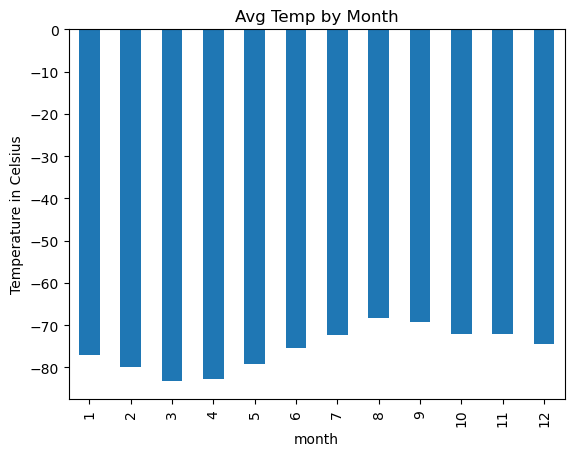

In [80]:
# Plot the average temperature by month
mars_data_df_avg_mintemp.plot(x='month',y='min_temp', kind = 'bar')
plt.ylabel('Temperature in Celsius')
plt.title('Avg Temp by Month')

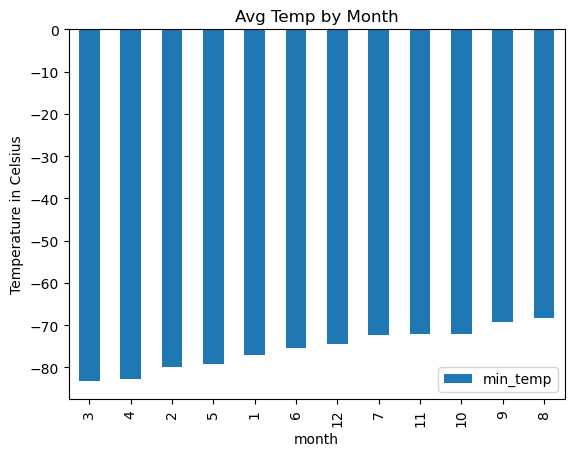

In [79]:
# Identify the coldest and hottest months in Curiosity's location
mars_data_df_groupby_month = mars_data_df_groupby_month.sort_values(by='min_temp')
mars_data_df_groupby_month.plot(x='month',y='min_temp', kind = 'bar')
plt.ylabel('Temperature in Celsius')
plt.title('Avg Temp by Month')
plt.show()

In [89]:
# 4. Average pressure by Martian month
mars_data_df_by_pressure = mars_data_df.groupby('month')
mars_data_df_avg_pressure = mars_data_df_by_pressure['pressure'].mean(numeric_only=True)
mars_data_df_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

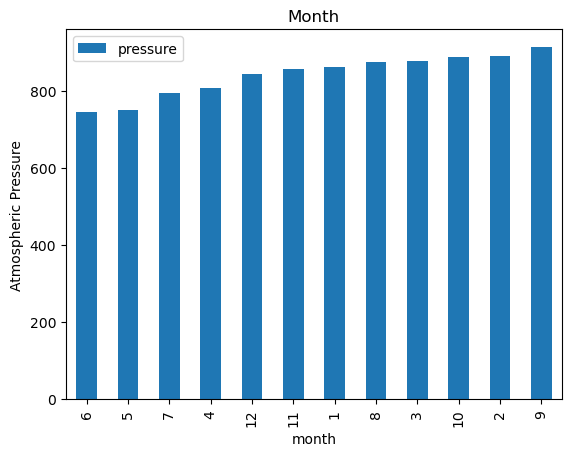

In [91]:
# Plot the average pressure by month
mars_data_df_groupby_month = mars_data_df_groupby_month.sort_values(by='pressure')
mars_data_df_groupby_month.plot(x='month',y='pressure', kind = 'bar')
plt.ylabel('Atmospheric Pressure')
plt.title('Month')
plt.show()

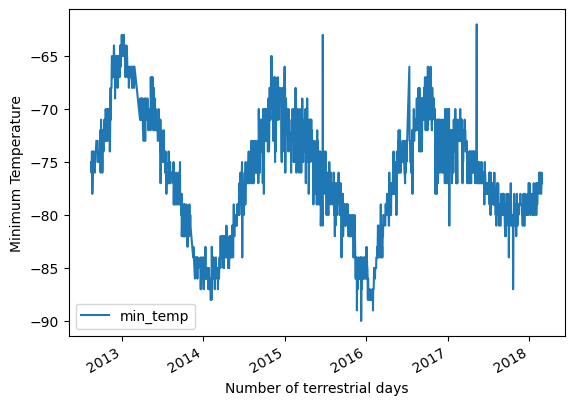

In [96]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_data_df.plot(x='terrestrial_date',y='min_temp')
plt.ylabel('Minimum Temperature')
plt.xlabel('Number of terrestrial days')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [97]:
# Write the data to a CSV
mars_data_df.to_csv('Mission to mars.csv', encoding='utf-8')

In [98]:
browser.quit()